# Recognizing Characters of Devanagari Script
### Author: Ruchika Sah

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Recognizing-Characters-of-Devanagari-Script" data-toc-modified-id="Recognizing-Characters-of-Devanagari-Script-1">Recognizing Characters of Devanagari Script</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Author:-Ruchika-Sah" data-toc-modified-id="Author:-Ruchika-Sah-1.0.1">Author: Ruchika Sah</a></span></li></ul></li><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1.1">Problem Statement</a></span></li></ul></li><li><span><a href="#Executive-Summary" data-toc-modified-id="Executive-Summary-2">Executive Summary</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Script" data-toc-modified-id="Script-2.0.0.1">Script</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2.0.0.2">Data</a></span></li><li><span><a href="#Challenges" data-toc-modified-id="Challenges-2.0.0.3">Challenges</a></span></li><li><span><a href="#Model-and-Results" data-toc-modified-id="Model-and-Results-2.0.0.4">Model and Results</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-3">Importing Libraries</a></span></li><li><span><a href="#Reading-Data" data-toc-modified-id="Reading-Data-4">Reading Data</a></span></li><li><span><a href="#Image-Preprocessing" data-toc-modified-id="Image-Preprocessing-5">Image Preprocessing</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-6">Model</a></span><ul class="toc-item"><li><span><a href="#Set-up" data-toc-modified-id="Set-up-6.1">Set up</a></span></li><li><span><a href="#Pickling-the-model" data-toc-modified-id="Pickling-the-model-6.2">Pickling the model</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-6.3">Analysis</a></span><ul class="toc-item"><li><span><a href="#Comparing-the-true-images-with-the-misclassified-images" data-toc-modified-id="Comparing-the-true-images-with-the-misclassified-images-6.3.1">Comparing the true images with the misclassified images</a></span></li></ul></li></ul></li><li><span><a href="#Conclusions-and-Next-Steps" data-toc-modified-id="Conclusions-and-Next-Steps-7">Conclusions and Next Steps</a></span></li></ul></div>

## Problem Statement

Character classification is an important part of Optical Character Recognition, Licence Plate Recognition, House Number Recognition etc This project focuses on reviewing the existing methods for Character recognition of handwritten characters using Machine Learning and applying those methods to recognize
handwritten characters of alphabets in the Hindi language, which has a  very different script from English, called the Devanagiri script. I will be using various classification models for this as well CNN. The model will be evaluated using the Accuracy score. 

![devanagiri script](images/devanagiri.png)

# Executive Summary

#### Script

The Devanagari script  was developed in ancient India from the 1st to the 4th century CE and was in regular use by the 7th century CE. Unlike the Latin alphabet, the script has no concept of letter case(Upper or lower). It is written from left to right, has a strong preference for symmetrical rounded shapes within squared outlines and is recognisable by a horizontal line that runs along the top of full letters.


#### Data

The 92000 images of this dataset were generated by imaging the characters written by many individuals resulting in a wide variation in the way each character was written. Each of the dataset images of the characters is unique. The dataset is randomly split into a training set with 85% of the data and a testing set with 15% of the data. The Training Set consists of 78200 images and the training set consists of 13800 images. Each image is 32 x 32 pixels with the actual character centered within 28 x 28 pixels. 

#### Challenges

The challenges of the model result due to the fact that the dataset consists of many characters that are visually similar or written in a similar way by most people. 

#### Model and Results

Convolutional Neural Networks (CNN) were developed to make this classification. The model architecture that we used included 4 convolutional layers. The large and deep architecture of Deep CNN with a large bank of trainable parameters make it susceptible to overfitting. While training deep networks, it is very difficult to find optimal hyper parameters of teh functions. We used Dropout layers to prevent our model from overfitting. We were able to achieve 98.2% accuracy by adding two Pooling layers as well as including 2 Dropout layers of 0.25 and 0.5.  The model got 312 characters wrong out of 13800 in the testing set. Given the complexity of the characters, we are happy with the results. 

# Importing Libraries

In [1]:
from PIL import Image
import time
import cv2
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.offline    as py
import pickle


from keras                             import backend
from keras.preprocessing.image         import ImageDataGenerator
from keras.models    import Sequential
from keras.layers    import Dense, Dropout, Activation, Flatten
from keras.layers    import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from sklearn.metrics                   import confusion_matrix

#py.init_notebook_mode(connected=False) 
#cf.set_config_file(offline=True)
import random
random.seed(42)

Using TensorFlow backend.
/anaconda3/envs/dsi/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/anaconda3/envs/dsi/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/anaconda3/envs/dsi/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/anaconda3/envs/dsi/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will

# Reading Data

Downloading the train dataset and test dataset, which are in two different folders. The train folder contain 46 folders each containing 2000 images of respective classes. The test folder contains 46 folders with 300 images of the respective classes inside.

In [2]:
%matplotlib inline
train_path='./DevanagariHandwrittenCharacterDataset/Train'
test_path='./DevanagariHandwrittenCharacterDataset/Test'

# Image Preprocessing

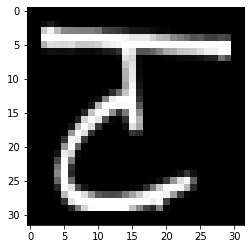

In [26]:
from keras.preprocessing.image import load_img
from IPython.display import Image 

plt.imshow(load_img('./DevanagariHandwrittenCharacterDataset/Train/character_11_tta/10577.png'))

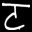

In [287]:
firstimage_train = Image.open('./DevanagariHandwrittenCharacterDataset/Train/character_11_tta/10577.png')
firstimage_train

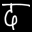

In [320]:
firstimage_train = Image.open('./DevanagariHandwrittenCharacterDataset/Train/character_18_da/10880.png')
firstimage_train

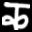

In [234]:
firstimage_test = Image.open('./DevanagariHandwrittenCharacterDataset/Test/character_1_ka/10964.png')
firstimage_test

Setting up train set and the test set. The ImageDataGenerator class has three methods flow(), flow_from_directory() and flow_from_dataframe() to read the images from a big numpy array and folders containing images. We are using flow_from directory method.

In [6]:
#Image Batches - Normalized Images

#Train
group = ['character_1_ka','character_2_kha',
            'character_3_ga','character_4_gha','character_5_kna','character_6_cha','character_7_chha','character_8_ja',
            'character_9_jha','character_10_yna','character_11_tta','character_12_ttha','character_13_dda','character_14_ddha',
            'character_15_adna','character_16_ta','character_17_thha','character_18_da','character_19_dha','character_20_na',
            'character_21_pa','character_22_pha','character_23_ba','character_24_bha','character_25_ma','character_26_ya',
            'character_27_ra','character_28_la','character_29_wa','character_30_sha','character_31_shha','character_32_sa',
            'character_33_ha','character_34_chha','character_35_tra','character_36_gya','digit_0','digit_1',
            'digit_2','digit_3','digit_4','digit_5','digit_6','digit_7','digit_8','digit_9']

train_batches=ImageDataGenerator().flow_from_directory(train_path,
                                                       target_size=(64,64),
                                                       classes=group,
                                                       class_mode ='categorical',
                                                       batch_size=30)

#Unshuffled Test, so we can make a confusion matrix easily later
test_batches=ImageDataGenerator().flow_from_directory(test_path,
                                                       target_size=(64,64),
                                                       classes=group,
                                                      class_mode ='categorical',
                                                      batch_size=30,shuffle=False)

Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.


In [9]:
# Plot batches with labels

def plots(ims,figsize=(12,6),rows=1,interp=False,titles=None):
    
    #Format images
    if type(ims[0]) is np.ndarray:
        ims=np.array(ims).astype(np.uint8)
        if (ims.shape[-1]!=3):
            ims=ims.transpose((0,2,3,1))
    
    #Subplots and titles
    f=plt.figure(figsize=figsize)
    cols=len(ims)//rows if len(ims)%2==0 else len(ims)//rows+1
    for i in range(len(ims)):
        sp=f.add_subplot(rows,cols,i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
            
    #Show        
        plt.imshow(ims[i],interpolation=None if interp else 'none')

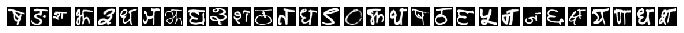

In [10]:
imgs,labels=next(train_batches)
plots(imgs);

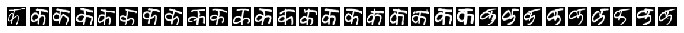

In [12]:
imgs,labels=next(test_batches)
plots(imgs);

In [13]:
np.unique(test_batches.classes)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int32)

In [14]:
np.unique(train_batches.classes)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int32)

In [ ]:
train_batches.class_indices

In [ ]:
test_batches.class_indices

# Model 

## Set up

Below is a illustrative graphic that shows what is happening at each layer of the convoluted neural network. This graphic is an image (the input) being passed through the model, and a filter (Conv2D) passing through the image and taking the dot product of the pixel values and applying Relu (Rectified Linear Unit) to get a number between 0 and infinity. The pooling layer (MaxPooling2D) takes the maximum values from the convolution layer and reduces the dimensions of the image (and also helps speed up processing time). The flattened layer (Flatten()) takes the image pixels in the previous layer and flattens it out (32 x 32 x 2000 = 1280). The Dropout layer randomly ignores certain neurons and helps prevent overfitting. The densely connected layer (Dense) is connected to every node in the previous layer and applies ReLu to its output values. Finally, the output layer (also Dense) applies the softmax activation function to show probabilities for all 46 characters, and all of the probabilities will add up to 1.

![cnn model](./images/cnn.jpeg)

Calculating the step size to use in the model

In [243]:
step_size_train=train_batches.n//train_batches.batch_size
step_size_train

2606

In [ ]:
step_size_test=test_batches.n//test_batches.batch_size

After going through a lot of combinations of convoluted layers, the model that worked the best was the one which had 4 convoluted layers, 2 MaxPooling Layers with Dropouts of 0.25 initially and 0.5 for the second Dropout. 

## Pickling the model 
We had to pickle the model so that it did not have to run everytime we opened the notebook. This model took almost 7 hours to run. 

In [15]:
infile = open("cnn_model", "rb") # reading the file
model = pickle.load(infile) # loading the file into the object
infile.close()

The CNN Model was trained as a multiclass classification problem. The batch size is 30 and the network was trained for 20 epochs. 

In [244]:
#Early stopping to regularize
#early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')

#Instantiate model with 20% dropout to regularize
model=Sequential([
          Conv2D(filters=16,            # number of filters
                     kernel_size=(3, 3),        # height/width of filter
                     activation='relu',      # activation function 
                     input_shape=(64, 64, 3),
                strides =(1,1)),
         Conv2D(filters = 32,
               kernel_size =(5,5),
               activation = "relu"),
            MaxPooling2D(pool_size=(2, 2), strides = 2),
            Dropout(0.25),
        Conv2D(filters = 64,
              kernel_size = (3,3),
              strides = (1,1),
              activation = 'relu'),
        Conv2D(filters = 128,
              kernel_size =(3,3),
               strides =(1,1),
              activation = "relu"),
        MaxPooling2D(pool_size =(2,2), strides = 2),
        Dropout(0.5),
          Flatten(),
          Dense(256,activation='relu'),
          Dense(128, activation = 'relu'),
          Dense(46,activation='softmax')])


The compile layer configures the model before training. Here we specify the Loss funtion to be 'categorical_crossentropy', since that is specific to multiclass classification models. Also, the metric to evaluate the model is accuracy. Accuracy is the number of correct predictions divided by the total number of predictions.

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Fitting the model. With a step size of 2606 and 20 epochs the model took 7 hours and 5 minutes to run. 

In [245]:
%%time
#Fit
step_size_train=train_batches.n//train_batches.batch_size
step_size_test=test_batches.n//test_batches.batch_size
history=model.fit(train_batches,
          steps_per_epoch=step_size_train,
          validation_data=test_batches,
          epochs=20)
          #callbacks=[early_stop]

Epoch 1/20
2606/2606 [==============================] - 1193s 458ms/step - loss: 0.9383 - accuracy: 0.7833 - val_loss: 0.0114 - val_accuracy: 0.9343
Epoch 2/20
2606/2606 [==============================] - 1223s 469ms/step - loss: 0.2517 - accuracy: 0.9237 - val_loss: 0.0263 - val_accuracy: 0.9306
Epoch 3/20
2606/2606 [==============================] - 1279s 491ms/step - loss: 0.1824 - accuracy: 0.9440 - val_loss: 0.0807 - val_accuracy: 0.9592
Epoch 4/20
2606/2606 [==============================] - 1245s 478ms/step - loss: 0.1443 - accuracy: 0.9560 - val_loss: 0.0547 - val_accuracy: 0.9641
Epoch 5/20
2606/2606 [==============================] - 1241s 476ms/step - loss: 0.1194 - accuracy: 0.9626 - val_loss: 0.2015 - val_accuracy: 0.9675
Epoch 6/20
2606/2606 [==============================] - 1154s 443ms/step - loss: 0.1011 - accuracy: 0.9688 - val_loss: 0.2604 - val_accuracy: 0.9685
Epoch 7/20
2606/2606 [==============================] - 1309s 502ms/step - loss: 0.0921 - accuracy: 0.9720

The training loss for Model 1 starts relatively high, but by the 20th epoch it’s close to 0.06. The validation loss, on the other hand, starts out very low and becomes even lower, while the accuracy scores both reach 98%. The model got about 2% of the predictions wrong, which we will see below, was justified.

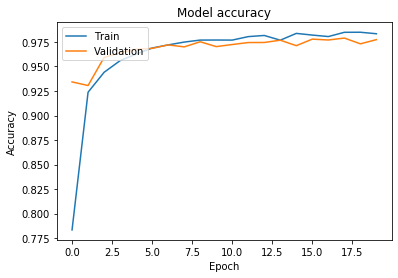

In [246]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

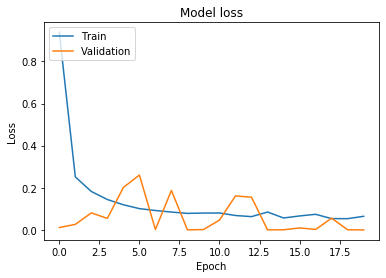

In [247]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 58, 58, 32)        12832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 27, 27, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 128)      

In [298]:
#outfile = open("cnn_model", 'wb') # making a new empty file
#pickle.dump(model, outfile) # dumping the model onto pickle
#outfile.close() # closing file

In [300]:
#infile = open("cnn_model", "rb") # reading the file
#model = pickle.load(infile) # loading the file into the object
#infile.close()

This model had 4.8 million parameters. 

Getting our predictions for the test batches of the characters using predict_generator. 

In [17]:
test_batches.reset()
preds = model.predict_generator(test_batches)
preds

array([[9.9999988e-01, 5.6419848e-15, 2.9290412e-10, ..., 1.9310591e-13,
        1.3903550e-15, 8.8979888e-15],
       [1.0000000e+00, 1.7224447e-27, 1.1868549e-22, ..., 4.8470036e-24,
        2.1413637e-25, 3.3578827e-24],
       [9.9999988e-01, 1.1158500e-20, 9.2301155e-18, ..., 4.5637034e-16,
        9.1847096e-16, 1.4592421e-17],
       ...,
       [5.1738651e-29, 7.4285025e-32, 1.4685146e-36, ..., 5.7577486e-28,
        5.8962984e-33, 1.0000000e+00],
       [4.3675002e-28, 6.1915579e-34, 0.0000000e+00, ..., 9.6476978e-31,
        7.0356425e-37, 1.0000000e+00],
       [1.0709287e-32, 4.3297167e-33, 0.0000000e+00, ..., 3.4009158e-30,
        7.4723450e-35, 1.0000000e+00]], dtype=float32)

In [18]:
len(preds[0])

46

In [19]:
preds[0]

array([9.99999881e-01, 5.64198482e-15, 2.92904118e-10, 2.00642549e-13,
       7.27094470e-12, 2.68772770e-13, 3.23141991e-12, 5.06236979e-13,
       4.13376867e-11, 6.87608234e-11, 1.62699561e-17, 6.10237052e-08,
       7.58843265e-14, 1.34341340e-11, 4.70961974e-13, 1.10448855e-11,
       2.88566608e-14, 5.35155297e-12, 1.41213758e-14, 2.07713194e-10,
       1.19938951e-14, 9.36902986e-11, 2.77436953e-08, 2.74701078e-11,
       5.04296827e-10, 4.83415987e-13, 5.27983657e-10, 2.83746100e-11,
       2.19152785e-08, 4.34753795e-12, 7.77552502e-12, 1.79251070e-09,
       2.44671609e-11, 1.08608299e-13, 5.79172196e-11, 1.42189998e-14,
       5.76417832e-16, 2.59763558e-14, 1.23616728e-10, 1.50855382e-08,
       1.50129442e-12, 3.50689360e-14, 8.53819968e-15, 1.93105907e-13,
       1.39035503e-15, 8.89798878e-15], dtype=float32)

In [20]:
y_pred = np.argmax(preds, axis = 1)
y_pred

array([ 0,  0,  0, ..., 45, 45, 45])

In [21]:
y_true = test_batches.classes

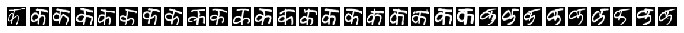

In [22]:
#A look at which images are misclassfied
imgs,labels=test_batches[1]
plots(imgs)

In [23]:
cm=confusion_matrix(y_true, y_pred)
cm
#ax= plt.subplot()
#plt.figure(figsize=(60,60))
#sns.heatmap(cm, ax = ax, fmt=".1f",cmap='Blues', cbar=False); 
#ax.set_xlabel('Predicted labels');
#ax.set_ylabel('True labels'); 
#ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['Enhanced', 'Not Enhanced']); ax.yaxis.set_ticklabels(['Enhanced', 'Not Enhanced']);

array([[298,   0,   0, ...,   0,   0,   0],
       [  0, 294,   0, ...,   0,   0,   0],
       [  0,   0, 296, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 299,   0,   0],
       [  0,   0,   0, ...,   0, 300,   0],
       [  0,   0,   0, ...,   0,   0, 299]])

In [24]:
y_true.shape

(13800,)

## Analysis
Finding the images that the CNN classified wrong. 

In [260]:
missed = np.arange(13800)[y_true != y_pred]
missed

array([  208,   245,   357,   364,   415,   432,   566,   568,   767,
         828,   850,   851,   902,   911,   919,   924,   931,   932,
         935,   978,   987,   998,  1042,  1045,  1081,  1087,  1088,
        1127,  1175,  1201,  1229,  1270,  1271,  1281,  1297,  1310,
        1319,  1330,  1338,  1355,  1357,  1369,  1379,  1404,  1440,
        1441,  1446,  1454,  1481,  1488,  1490,  1491,  1562,  1573,
        1649,  1789,  1808,  1843,  1844,  1855,  1856,  1867,  1927,
        1931,  1939,  1942,  1947,  2034,  2155,  2157,  2246,  2339,
        2396,  2784,  2793,  2819,  2936,  2954,  2997,  2999,  3007,
        3008,  3009,  3010,  3020,  3034,  3035,  3038,  3042,  3053,
        3155,  3171,  3195,  3198,  3202,  3233,  3254,  3330,  3354,
        3421,  3505,  3519,  3609,  3731,  3910,  3930,  3936,  3957,
        3969,  4018,  4060,  4122,  4140,  4146,  4168,  4239,  4291,
        4439,  4658,  4941,  4954,  4981,  4985,  5033,  5042,  5046,
        5077,  5078,

In [393]:
y_pred[6257]

41

In [394]:
group[41]

'digit_5'

In [395]:
y_true[6257]

20

In [396]:
group[20]

'character_21_pa'

In [261]:
missed.shape

(312,)

In [262]:
missed_filepaths = [test_batches.filepaths[i] for i in missed]

In [263]:
len(missed_filepaths)

312

Seeing the actual path of the missed images

In [264]:
for i, image in enumerate(missed_filepaths):
    print(i, image)

0 ./DevanagariHandwrittenCharacterDataset/Test/character_1_ka/68880.png
1 ./DevanagariHandwrittenCharacterDataset/Test/character_1_ka/81263.png
2 ./DevanagariHandwrittenCharacterDataset/Test/character_2_kha/20772.png
3 ./DevanagariHandwrittenCharacterDataset/Test/character_2_kha/26612.png
4 ./DevanagariHandwrittenCharacterDataset/Test/character_2_kha/44814.png
5 ./DevanagariHandwrittenCharacterDataset/Test/character_2_kha/44956.png
6 ./DevanagariHandwrittenCharacterDataset/Test/character_2_kha/86192.png
7 ./DevanagariHandwrittenCharacterDataset/Test/character_2_kha/86201.png
8 ./DevanagariHandwrittenCharacterDataset/Test/character_3_ga/64732.png
9 ./DevanagariHandwrittenCharacterDataset/Test/character_3_ga/75150.png
10 ./DevanagariHandwrittenCharacterDataset/Test/character_3_ga/75280.png
11 ./DevanagariHandwrittenCharacterDataset/Test/character_3_ga/75285.png
12 ./DevanagariHandwrittenCharacterDataset/Test/character_4_gha/11984.png
13 ./DevanagariHandwrittenCharacterDataset/Test/charac

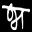

In [281]:
from keras.preprocessing.image import load_img
from IPython.display import Image 

missed_img = load_img(missed_filepaths[200])
missed_img

Some examples of missed images. One can see the similarities in the way the characters are shaped. The model still had a great accuracy score given the difficulty in identifying similar shapes.

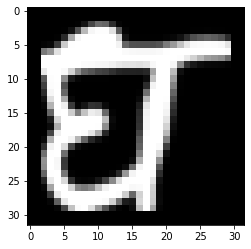

In [319]:
plt.imshow(load_img(missed_filepaths[19]))

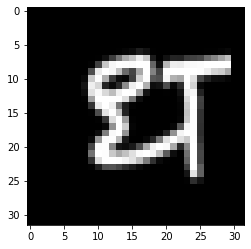

In [318]:
plt.imshow(load_img(missed_filepaths[157]))

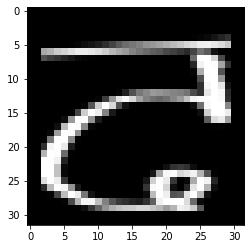

In [312]:
plt.imshow(load_img(missed_filepaths[132]))

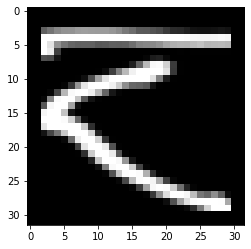

In [385]:
plt.imshow(load_img(missed_filepaths[232]))

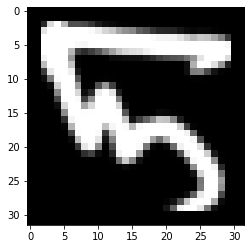

In [291]:
plt.imshow(load_img(missed_filepaths[174]))

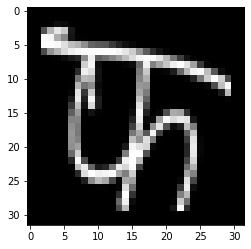

In [290]:
plt.imshow(load_img('./DevanagariHandwrittenCharacterDataset/Train/character_22_pha/11160.png'))


### Comparing the true images with the misclassified images

In [347]:
def show_three(filepaths):
    fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(10,10))
    #ax1.set_title('True Character')
    #ax2.set_title('Test Character')
    #axes3.set_title('Misclassified Character')
    axes = axes.flatten()
    for i, path in enumerate(filepaths):
        missed_img = load_img(path)
        axes[i].imshow(missed_img)
        axes[0].set_title('True Character')
        axes[1].set_title('Test Character')
        axes[2].set_title('Misclassified Character')
        


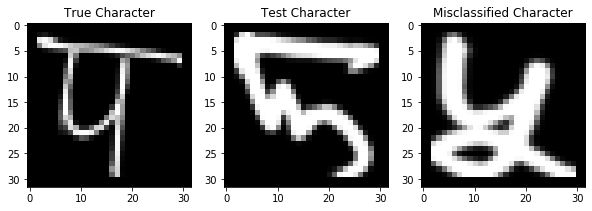

In [398]:
filepath1 = ('./DevanagariHandwrittenCharacterDataset/Train/character_21_pa/11109.png')
filepath2 = ('./DevanagariHandwrittenCharacterDataset/Test/character_22_pha/22341.png')
filepath3 = ('./DevanagariHandwrittenCharacterDataset/Train/digit_5/10035.png')
filepaths = [filepath1, filepath2, filepath3]

show_three(filepaths)


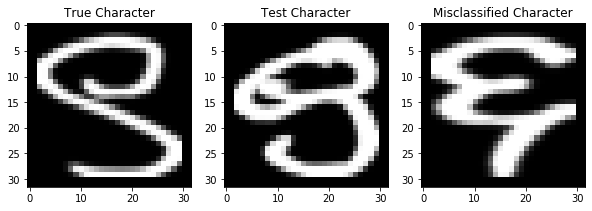

In [370]:
filepath1 = ('./DevanagariHandwrittenCharacterDataset/Train/digit_9/104261.png')
filepath2 = ('./DevanagariHandwrittenCharacterDataset/Test/digit_9/50120.png')
filepath3 = ('./DevanagariHandwrittenCharacterDataset/Train/digit_6/10091.png')
filepaths = [filepath1, filepath2, filepath3]

show_three(filepaths)

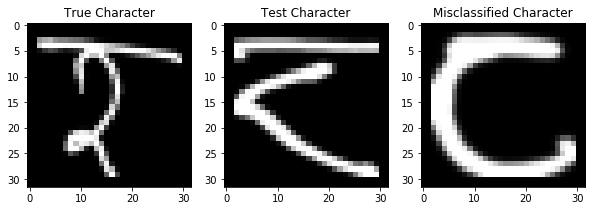

In [386]:
filepath1 = ('./DevanagariHandwrittenCharacterDataset/Train/character_27_ra/11375.png')
filepath2 = ('./DevanagariHandwrittenCharacterDataset/Test/character_27_ra/6381.png')
filepath3 = ('./DevanagariHandwrittenCharacterDataset/Train/digit_8/10349.png')
filepaths = [filepath1, filepath2, filepath3]

show_three(filepaths)

Showing all the missclassified images 25 at a time.

In [304]:
def show_missed(filepaths):
    fig, axes = plt.subplots(nrows=5,ncols=5, figsize=(10,10))
    axes = axes.flatten()
    for i, path in enumerate(filepaths):
        missed_img = load_img(path)
        axes[i].imshow(missed_img)
        
    


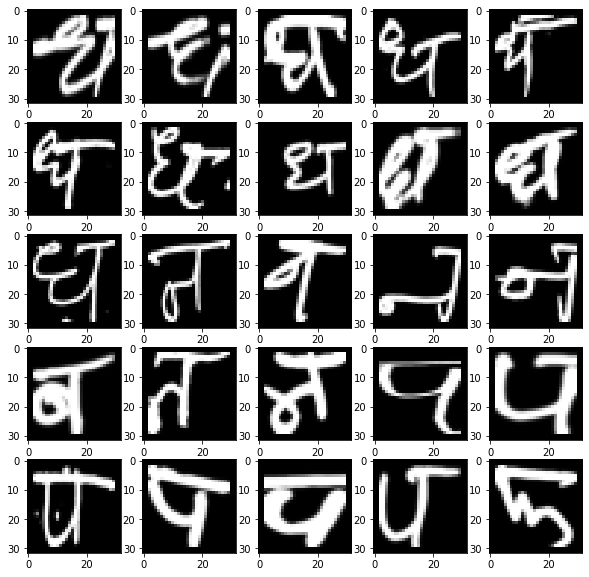

In [307]:
show_missed(missed_filepaths[150:175])

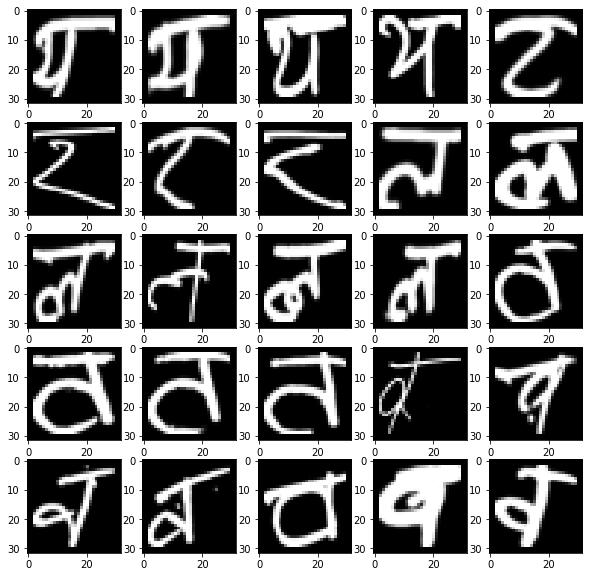

In [309]:
show_missed(missed_filepaths[225:250])

# Conclusions and Next Steps

We used the Devanagiri Handwritten Character Dataset which is a publicly available dataset for any researcher. It contains 92000 images of 46 handwritten characters of the script. The challenges in the dataset come from the fact that many characters are visually similar or written in the same way. 
We ran a CNN model for image recognition. It has 4 Convoluted network layers with two MaxPooling layers to reduce features and avoid overfitting. 

Inspite of the characters in the language being so similar and complicted and given the variances in handwritten characters, the model performed very well at 98.3% accuracy. Out of the 13800 test characters (with 300 per class and 46 classes of characters), it misclassified only 312. This shows that Deep CNN models with added Pooling layers and Dropout layers can result in a high test accuracy.

This dataset included 46 characters and did not include the vowels. For the future, this dataset could be extended to include the vowel characters as well. This model could also be extended to other languages like Mandarin or Japanese which have more difficult characterizations. It could also be implemented to design a complete handwritten document digitizing system. 